# Give me Some Credit | Kaggle

### Ryan Razaan Gunawan - Data Science Project

**Konten Notebook :**

- Exploratory Data Analysis
- Feature Engineering
- Model Iterations
- Result Comparison (AUC ROC, Recall, Precision, F1-score)

___________________
# Code Starts Here
___________________

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Datasets

In [2]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')

___________
### Given information
#### Data dictionary
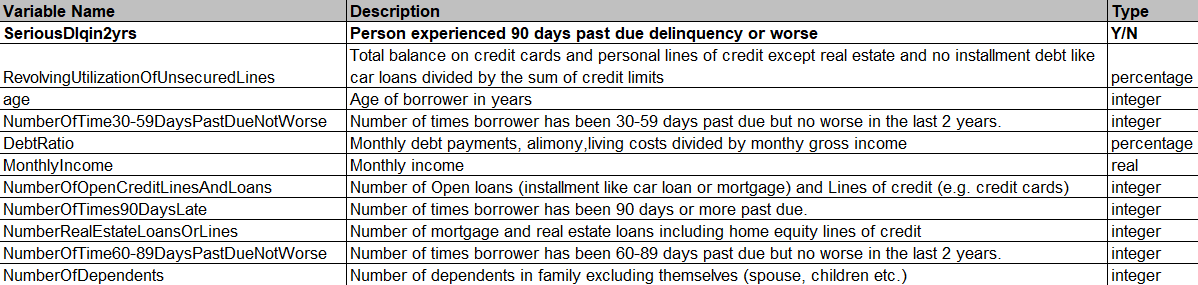

____________
## Data Preprocessing

Dari hasil searching di internet, saya memilih untuk melakukan imputasi missing value terlebih dahulu diikuti dengan memotong outlier. <br>
src = https://discuss.analyticsvidhya.com/t/does-outlier-treatment-come-first-or-missing-value-imputation/11416/5

#### Dropping Unnamed: 0 Column

In [3]:
df_train = df_train.drop("Unnamed: 0", axis = 1)
df_test = df_test.drop("Unnamed: 0", axis = 1)

### Checking for missing values

In [4]:
def visualize_null(dataset):
    column_name = list(dataset.keys())
    values      = list(dataset.isnull().sum())
    # creating the bar plot
    plt.bar(column_name, values, color ='maroon')

    plt.ylabel("Missing Values")
    plt.title("Column Missing Values")
    plt.xticks(rotation = 'vertical', size=12)
    
    plt.show()

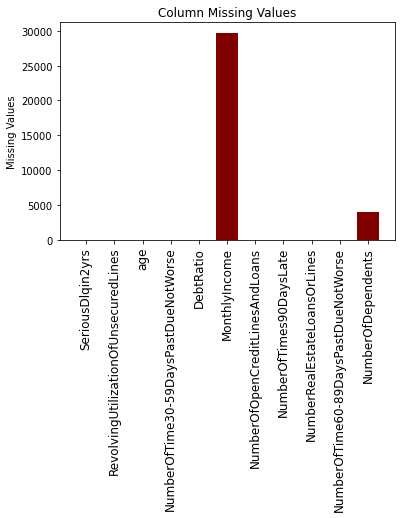

In [5]:
visualize_null(df_train)

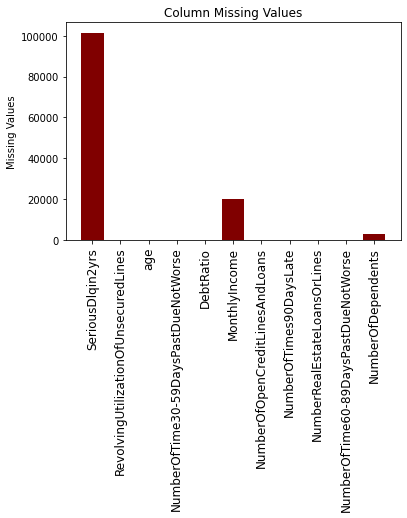

In [6]:
visualize_null(df_test)

Total row pada train dataset = 150000 <br>
Apabila +- 30000 missing value kita drop, maka akan mengurangi presisi pada model sebanyak 20% <br>
Maka saya harus mencari solusi untuk mengisi missing value menggunakan Regression pada variable **MonthlyIncome** dan **NumberOfDependents**

### NumberOfDependents NA Imputation using median

In [7]:
new_Dependents = []
new_Dependents1 = []
med = df_train.NumberOfDependents.median()
med1 = df_train.NumberOfDependents.median()
for val in df_train.NumberOfDependents:
    if val.is_integer() == False:
        new_Dependents.append(med)
    else:
        new_Dependents.append(val)
for val in df_test.NumberOfDependents:
    if val.is_integer() == False:
        new_Dependents1.append(med1)
    else:
        new_Dependents1.append(val)
print("The value of NumberOfDependents's median is : ", med)

The value of NumberOfDependents's median is :  0.0


In [8]:
df_train.NumberOfDependents = new_Dependents
df_test.NumberOfDependents = new_Dependents1

Semua missing value pada kolom NumberOfDependents assign nilai 0 sesuai dengan hasil median dari kolom tersebut.

### Linear Regression for MonthlyIncome NA Imputation

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
train_inc = df_train[df_train.MonthlyIncome.isnull() == False]
test_inc = df_train[df_train.MonthlyIncome.isnull() == True]

train_inc.shape, test_inc.shape

((120269, 11), (29731, 11))

In [11]:
X_trainInc = train_inc.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_trainInc = train_inc.MonthlyIncome
X_testInc = test_inc.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [12]:
linReg = LinearRegression(fit_intercept=True, normalize=True).fit(X_trainInc, y_trainInc)

In [13]:
pred = linReg.predict(X_testInc)

In [14]:
predArr = []
for value in pred:
    predArr.append(value)

In [15]:
testAlldata = df_train[df_train.MonthlyIncome.isnull() == True]
testAlldata['MonthlyIncome'] = predArr
testAlldata.head()

C:\Users\ryang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.305682,57,0,5710.0,2534.659688,8,0,3,0,0.0
8,0,0.116951,27,0,46.0,3142.767254,2,0,0,0,0.0
16,0,0.061086,78,0,2058.0,6158.930976,10,0,2,0,0.0
32,0,0.083418,62,0,977.0,5062.353627,6,0,1,0,0.0
41,0,0.072898,81,0,75.0,5563.100658,7,0,0,0,0.0


In [16]:
new_Income = []
for i in df_train.index:
    if df_train.MonthlyIncome[i].is_integer() == True:
        new_Income.append(df_train.MonthlyIncome[i])
    else:
        new_Income.append(testAlldata.MonthlyIncome[i])

In [17]:
df_train.MonthlyIncome = new_Income

### Visualize Null after imputation

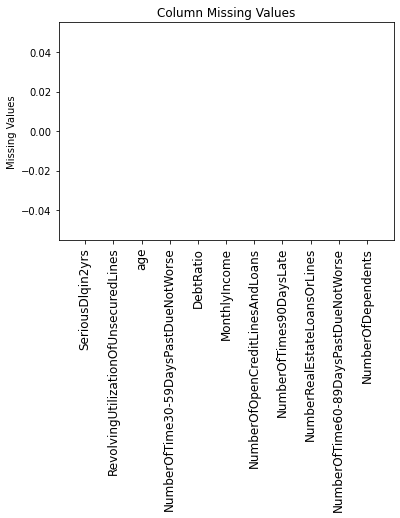

In [18]:
visualize_null(df_train)

NA Value sudah terimputasi sehingga kita bisa lanjut ke tahap selanjutnya.

__________
## Feature Engineering

#### Augment more columns into dataset to help find answers in EDA

**Salary Group** <br>
Pengelompokan MonthlyIncome agar mudah divisualisasi

In [19]:
df_train['MonthlyIncome'].describe()

count    1.500000e+05
mean     6.195470e+03
std      1.305700e+04
min     -3.434386e+05
25%      3.433131e+03
50%      5.000000e+03
75%      7.433000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [20]:
# Create list of conditions
temp = df_train['MonthlyIncome'].astype('int')
conditions = [
    (temp <=1000),
    (temp >1000) & (temp <=3000),
    (temp >3000) & (temp <=6000),
    (temp >6000) & (temp <=10000),
    (temp >10000) & (temp <=20000),
    (temp >20000),
]

In [21]:
# Create list of values for each condition
values = ['0-1000', '1000-3000', '3000-6000', '6000-10000', '10000-20000', '>20000']

In [22]:
df_train['SalaryGroup'] = np.select(conditions,values, default=np.nan)

df_train.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SalaryGroup
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,6000-10000
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,1000-3000
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,3000-6000
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,3000-6000
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,>20000
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0,3000-6000
6,0,0.305682,57,0,5710.000000,2534.659688,8,0,3,0,0.0,1000-3000
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0,3000-6000
8,0,0.116951,27,0,46.000000,3142.767254,2,0,0,0,0.0,3000-6000
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0,>20000


_____________

## Exploratory Data Analysis (EDA)

Beberapa pertanyaan yang akan saya coba jawab pada bagian EDA :
   - Visualisasi frekuensi outcome dari dataset ini.
   - Visualisasi persebaran umur peminjam.
   - Pada kelompok pendapatan manakah yang paling sering melewati batas peminjaman? 

Dari graph diatas, dapat ditentukan label untuk dataset adalah variable SeriousDlqin2yrs. Dan selain itu merupakan features.

### Visualisasi frekuensi outcome dari dataset ini.

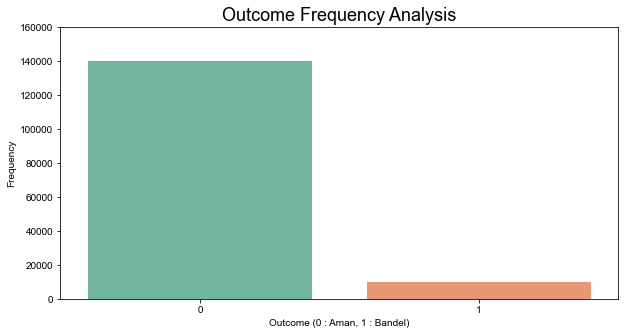

In [23]:
ax = sns.countplot(x = df_train.SeriousDlqin2yrs ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel('Outcome (0 : Aman, 1 : Bandel)')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
plt.title('Outcome Frequency Analysis')

plt.show()

### Visualisasi persebaran umur peminjam.

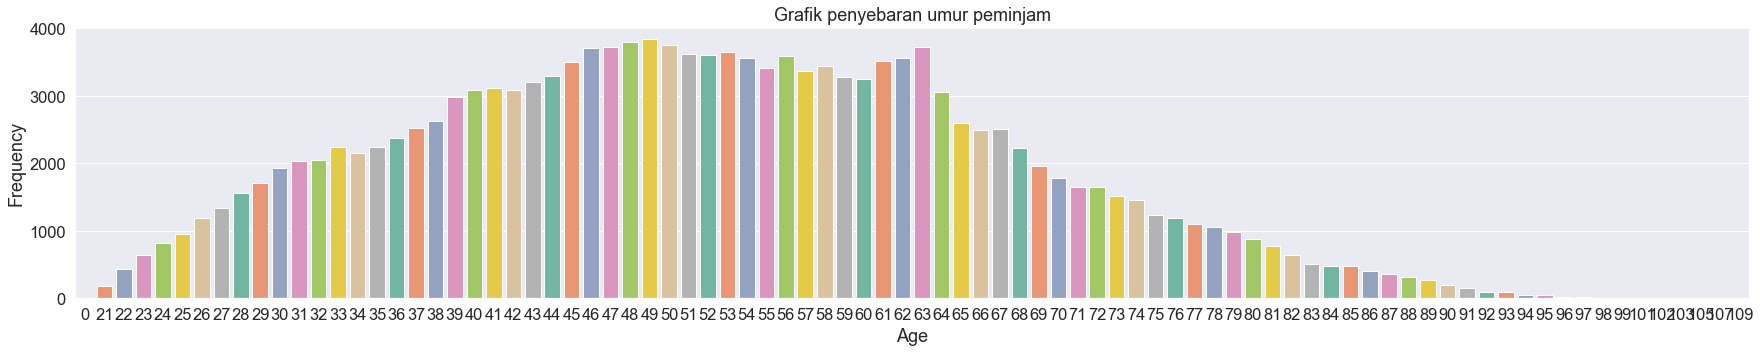

In [24]:
ax = sns.countplot(x = df_train.age ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(30,5)
# ax.set_ylim(top=100)
plt.title('Grafik penyebaran umur peminjam')

plt.show()

Jika dianalisa dari grafik diatas, maka kelompok umur yang paling banyak melakukan pinjaman pada bank ada pada umur 40-64, dengan semuanya memiliki frekuensi diatas 3000, dan umur 49 merupakan umur yang terdapat peminjam terbanyak. Selain itu penurunan dapat terlihat pada kelompok umur diatas 64 tahun.

### Pada kelompok pendapatan manakah yang paling sering melewati batas peminjaman?

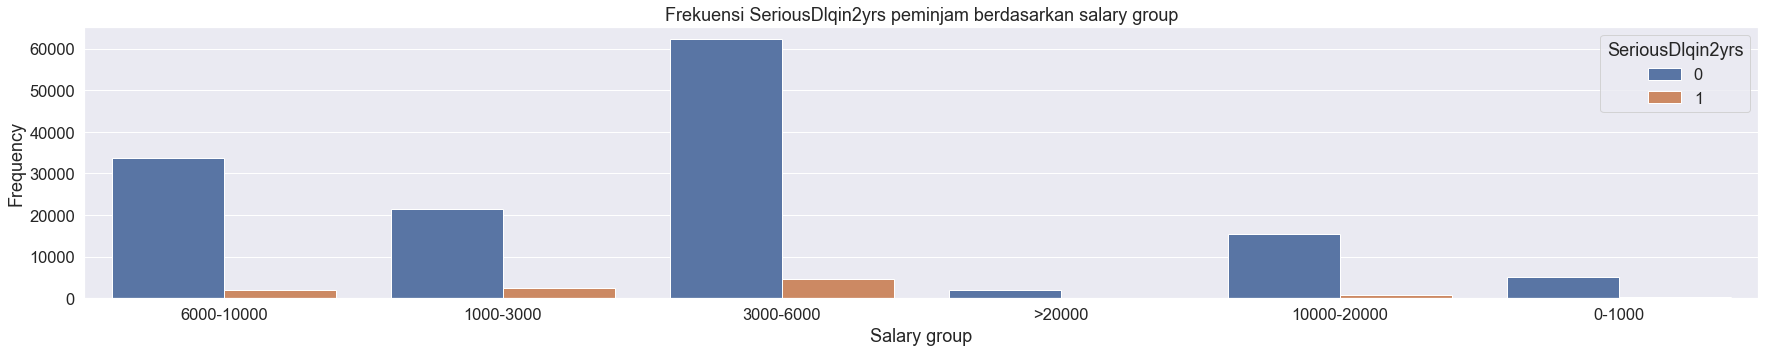

In [25]:
ax = sns.countplot(data = df_train,x = 'SalaryGroup' ,hue ='SeriousDlqin2yrs')
sns.set(font_scale=1.5)
ax.set_xlabel('Salary group')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(30,5)
# ax.set_ylim(top=100)
plt.title('Frekuensi SeriousDlqin2yrs peminjam berdasarkan salary group')

plt.show()

_____________
## Final data preparations

#### Drop SalaryGroup karena tidak diperlukan ML model.

In [26]:
df_train.drop(['SalaryGroup'], axis=1, inplace = True)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Train test split

In [27]:
features = df_train.drop(['SeriousDlqin2yrs'], axis=1)
label = df_train.SeriousDlqin2yrs
print(features.shape, label.shape)

(150000, 10) (150000,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25)

______________
## Model Iterations

Disini saya menggunakan Logistic Regression untuk mempredict value target pada df_test

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lReg = LogisticRegression(max_iter = 1000)
lReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Prediction 0/1
y_pred = lReg.predict(X_test)

In [32]:
# Probaility for each predicted values
y_pred_prob = lReg.predict_proba(X_test)
y_pred_prob = y_pred_prob[: ][:, 1]

### Plot the confusion matrix

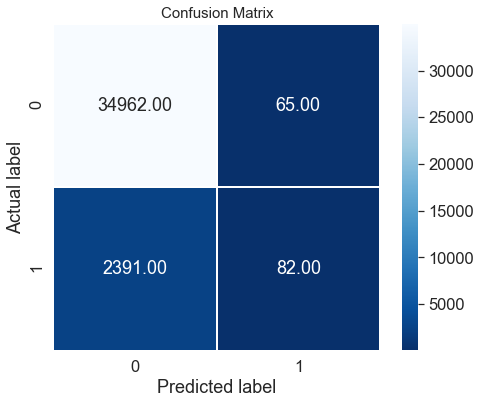

In [33]:
#confusion matrix
import sklearn.metrics as mt

cm = mt.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square =True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15)
plt.show()

_____
## Result Comparison

### Using classification_report to display precision,recall,f1-score, and accuracy

Hasil dibawah terlihat bagus dikarenakan kebias-an data yang tinggi terhadap output 0 ketimbang 1. Sehingga dibutuhkan AUC ROC validation untuk memberi result yang lebih tepat.

In [34]:
#classification report: recall, precision, f1-score, accuracy
print(mt.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35027
           1       0.56      0.03      0.06      2473

    accuracy                           0.93     37500
   macro avg       0.75      0.52      0.51     37500
weighted avg       0.91      0.93      0.91     37500



### ROC Curve Function

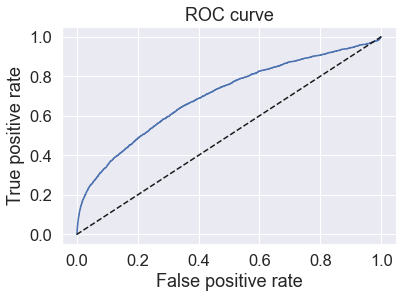

In [35]:
# x = False Positive rate | y = True Positive rate
def plot_roc(y_test, y_pred_prob):
    fpr, tpr, thresholds = mt.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    
plot_roc(y_test, y_pred_prob)

In [36]:
#AUC score
print('AUC Score : ',mt.roc_auc_score(y_test, y_pred_prob))

AUC Score :  0.6997415118654178


### Predicting values for target on test dataset, and exporting it to a new csv file for submission on kaggle.

In [37]:
df_test = df_test.fillna(0)
df_test_inputs = df_test.drop(['SeriousDlqin2yrs'], axis=1)
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,0.0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [38]:
df_test_inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [39]:
y_proba = lReg.predict_proba(np.array(df_test_inputs))
pred_model = pd.DataFrame({'Id': df_test.index.values + 1,
                                 'Probability': y_proba[:, 1]})
pred_model.set_index(keys = 'Id', inplace = True)
pred_model.to_csv('entry.csv')

____________
# Code ends here
______

# Reference list :
These are several of discussion pages on kaggle that i use to better understand the problem and the data. I only use the codes in which i totally understands, and not applying any sophisticated techniques that i haven't mastered yet.
   - https://github.com/IdoZehori/Credit_Score/blob/master/Credit%20score.ipynb
   - https://www.kaggle.com/c/GiveMeSomeCredit/discussion/32154
   - https://www.kaggle.com/sarboldipo/givemesomecredit-eda-logistic-regression-woe

Copyright&copy; Ryan Razaan Gunawan 2021.